<a href="https://colab.research.google.com/github/moh495/Regression/blob/master/ROP_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing Pandas and Numpy and Datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [ ]:
c

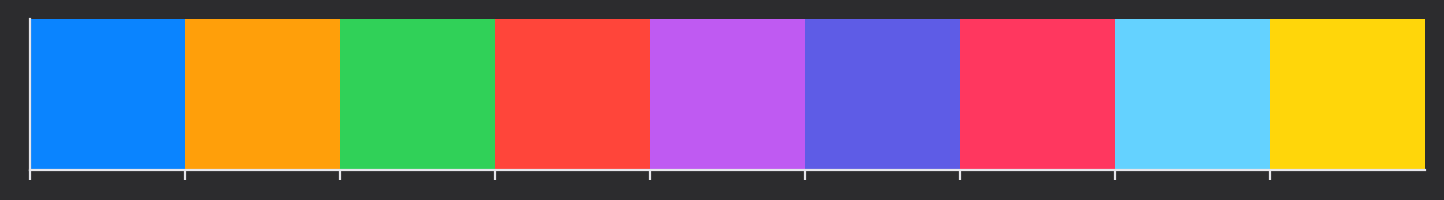

In [ ]:
sns.palplot(dark_palette)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TRAINIG.xlsx to TRAINIG.xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TRAINIG2.xlsx to TRAINIG2.xlsx


In [ ]:
import io
dftrain1 = pd.read_excel ('TRAINIG.xlsx')
dftrain1.to_csv ('TRAINIG.xlsx', index = None, header=True)

In [ ]:
import io
dftrain2 = pd.read_excel ('TRAINIG2.xlsx')
dftrain2.to_csv ('TRAINIG2.xlsx', index = None, header=True)

In [ ]:
df = pd.concat([dftrain1, dftrain2], ignore_index = True, axis = 0)

In [ ]:
df.head(2)

,ROP,RPM,T,WOB,T1,T2,T3,T4,T5,T6,Bit Position
0,21.6,71.538462,7774.846154,5596.350692,8050.461538,3108.153846,4942.307692,730.799825,369.669197,381.712227,1699.803150
1,21.6,71.384615,7971.076923,5935.523462,7430.153846,2892.230769,4537.923077,712.590119,348.041554,400.320539,1699.868766


In [ ]:
df.shape

(110768, 11)

In [ ]:
df.sample(5)

,ROP,RPM,T,WOB,T1,T2,T3,T4,T5,T6,Bit Position
97023,67.8,137.384615,10774.307692,25437.957692,42.153846,21.000000,21.153846,100.229783,17.456129,82.783411,4820.538058
86495,25.8,126.769231,8295.000000,9157.664769,38.615385,17.846154,20.769231,1.079913,0.319664,1.208313,2998.129921
41991,6.0,120.923077,5780.076923,22046.230000,2760.230769,1488.769231,1271.461538,732.445697,333.276190,400.759286,1902.362205
108923,3.6,139.076923,11093.076923,26964.235154,65.692308,28.461538,37.230769,1.974442,0.986520,2.030062,6512.860892
43471,6.6,114.846154,8358.230769,22724.575538,3852.384615,1963.000000,1889.384615,184.316917,85.284712,106.174935,1996.391076


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110768 entries, 0 to 110767
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ROP           110768 non-null  float64
 1   RPM           110768 non-null  float64
 2   T             110768 non-null  float64
 3   WOB           110768 non-null  float64
 4   T1            110768 non-null  float64
 5   T2            110768 non-null  float64
 6   T3            110768 non-null  float64
 7   T4            110768 non-null  float64
 8   T5            110768 non-null  float64
 9   T6            110768 non-null  float64
 10  Bit Position  110768 non-null  float64
dtypes: float64(11)
memory usage: 9.3 MB


In [ ]:
df.describe()

,ROP,RPM,T,WOB,T1,T2,T3,T4,T5,T6,Bit Position
count,110768.000000,110768.000000,110768.000000,110768.000000,110768.000000,110768.000000,110768.000000,110768.000000,110768.000000,110768.000000,110768.000000
mean,29.556744,135.918778,10647.080534,22451.052272,987.722121,459.025099,528.697022,180.336466,84.479476,99.584750,4293.913390
std,24.405250,20.976223,2193.082240,7527.738281,1292.718455,626.892079,681.786960,237.720926,117.074947,128.983336,1771.639498
min,0.000000,20.538462,1569.000000,0.000000,4.000000,1.769231,2.230769,0.202023,0.138812,0.130937,1632.874016
25%,9.600000,129.000000,9425.923077,17976.156769,84.769231,32.076923,51.750000,11.744044,3.568884,8.678705,2734.768701
50%,22.200000,139.153846,10524.538462,23572.507462,473.153846,179.692308,284.769231,98.361940,41.322754,56.579128,4316.305774
75%,43.800000,148.692308,11871.403846,28151.339846,1421.173077,665.923077,751.230769,262.280676,121.836528,144.015542,5750.106627
max,197.999999,173.076923,18692.538462,41548.664231,12792.000000,6102.230769,6782.769231,3974.211412,1898.221410,2105.337725,7857.906824


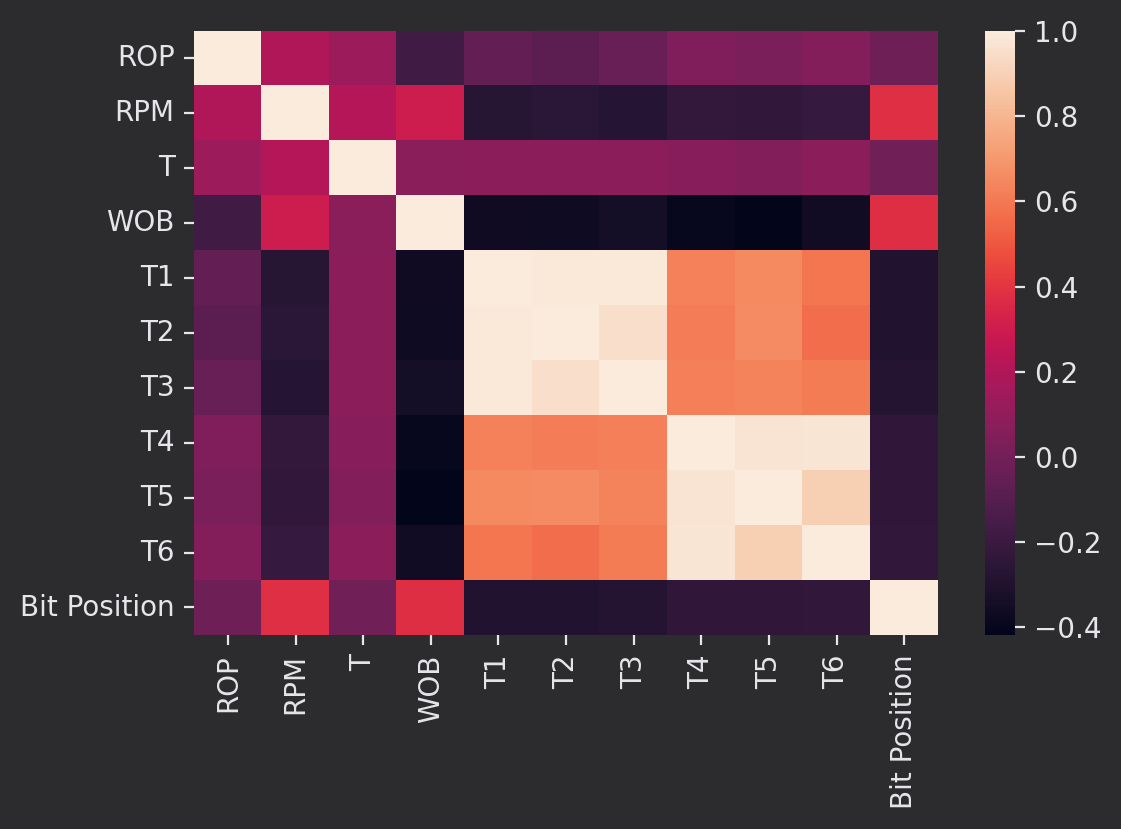

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()

,ROP,RPM,T,WOB,T1,T2,T3,T4,T5,T6,Bit Position
ROP,1.000000,0.201616,0.130855,-0.176575,-0.056024,-0.076004,-0.036342,0.038230,0.024060,0.055770,-0.024518
RPM,0.201616,1.000000,0.217789,0.297408,-0.270224,-0.259462,-0.273794,-0.224844,-0.230103,-0.214229,0.384229
T,0.130855,0.217789,1.000000,0.073776,0.081782,0.079478,0.081986,0.067048,0.051967,0.078430,-0.004169
WOB,-0.176575,0.297408,0.073776,1.000000,-0.357183,-0.364695,-0.341915,-0.392937,-0.417747,-0.354665,0.378694
T1,-0.056024,-0.270224,0.081782,-0.357183,1.000000,0.986729,0.988792,0.627707,0.652362,0.595134,-0.290498
T2,-0.076004,-0.259462,0.079478,-0.364695,0.986729,1.000000,0.951428,0.616977,0.658506,0.567090,-0.292304
T3,-0.036342,-0.273794,0.081986,-0.341915,0.988792,0.951428,1.000000,0.622879,0.631441,0.606989,-0.282036
T4,0.038230,-0.224844,0.067048,-0.392937,0.627707,0.616977,0.622879,1.000000,0.968529,0.974162,-0.239470
T5,0.024060,-0.230103,0.051967,-0.417747,0.652362,0.658506,0.631441,0.968529,1.000000,0.891177,-0.236810
T6,0.055770,-0.214229,0.078430,-0.354665,0.595134,0.567090,0.606989,0.974162,0.891177,1.000000,-0.234353


In [ ]:
Y = df['ROP']
X = df.drop(['ROP', 'T5', 'T4', 'T3'] , axis = 1)
X.columns

In [ ]:
Y.head(5)

0    21.6
1    21.6
2    21.6
3    20.4
4    20.4
Name: ROP, dtype: float64

In [ ]:
mpg_min = Y.min()
mpg_max = Y.max()
mpg_avg = Y.mean()
mpg_std = Y.std()

In [ ]:
summary = {'Statistics of ROP': [mpg_min, mpg_max, mpg_avg, mpg_std]}
stat_mpg = pd.DataFrame(data=summary, index=['Min', 'Max','Avg','Std'])
stat_mpg

,Statistics of ROP
Min,0.000000
Max,197.999999
Avg,29.556744
Std,24.405250


In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


In [ ]:
y_sc= NormalizeData(Y)
x_sc=NormalizeData(X)

In [ ]:
mpg_min = y_sc.min()
mpg_max = y_sc.max()
mpg_avg = y_sc.mean()
mpg_std = y_sc.std()

In [ ]:
summary = {'Statistics of ROP': [mpg_min, mpg_max, mpg_avg, mpg_std]}
stat_mpg = pd.DataFrame(data=summary, index=['Min', 'Max','Avg','Std'])
stat_mpg

,Statistics of ROP
Min,0.000000
Max,1.000000
Avg,0.149276
Std,0.123259


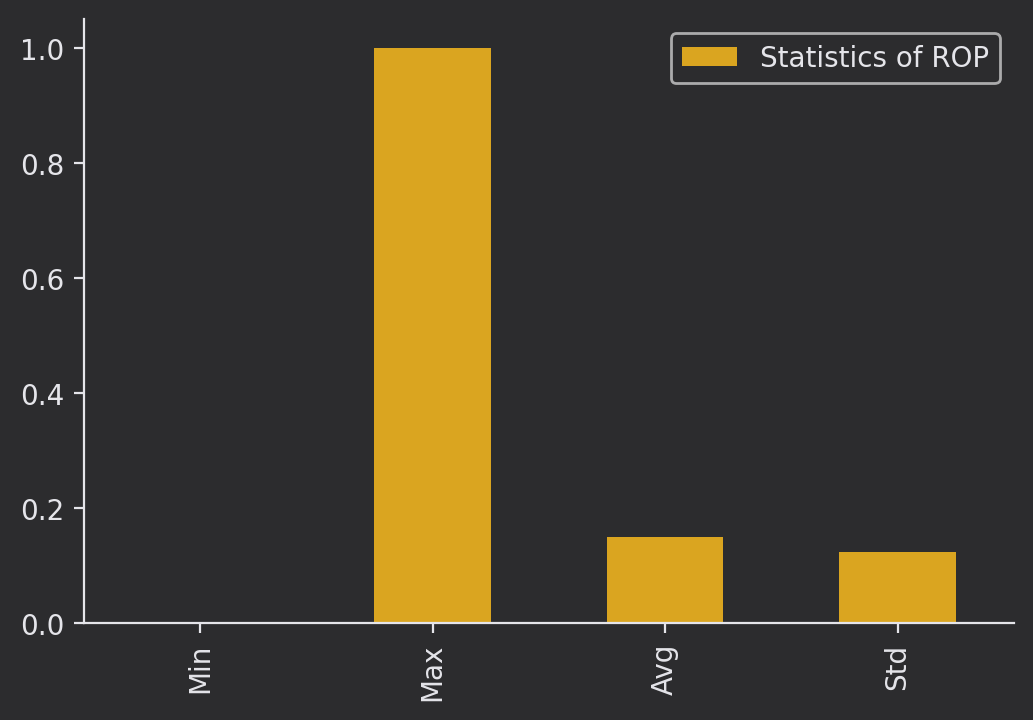

In [ ]:
stat_mpg.plot(kind='bar', color='goldenrod')


In [ ]:
print(mpg_avg-mpg_std, ' - ', mpg_avg, ' + ', mpg_avg+mpg_std)


0.02601764339782621  -  0.14927648445154215  +  0.2725353255052581


In [ ]:
y_sc= NormalizeData(Y)
x_sc=NormalizeData(X)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_sc, y_sc , test_size=0.2, random_state=44, shuffle =True)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
model = RidgeCV()
model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [ ]:
model.coef_

array([ 0.23524175,  0.09723182, -0.19403542,  0.94569625, -1.11528688,
        0.11665266, -0.02093019])

In [ ]:
model.intercept_

0.03865383104966831

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=33)
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
r2_score(y_test, y_pred)

0.9503829328760593

In [ ]:
mean_absolute_error(y_test, y_pred)

0.014405058574306066

In [ ]:
median_absolute_error(y_test, y_pred)

0.006787878854105759

In [ ]:
mean_squared_error(y_test, y_pred)


0.0007652280842587702

Coef of ROP: 0, Score: 0.17751
Coef of ROP: 1, Score: 0.09751
Coef of ROP: 2, Score: 0.20493
Coef of ROP: 3, Score: 0.04710
Coef of ROP: 4, Score: 0.06939
Coef of ROP: 5, Score: 0.04721
Coef of ROP: 6, Score: 0.35635


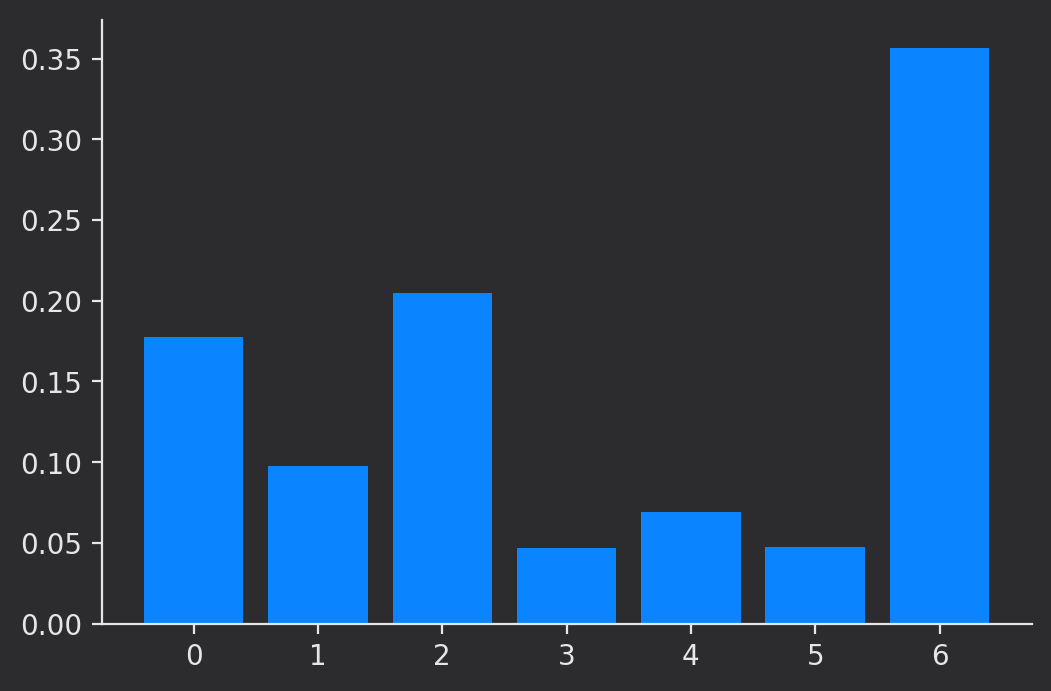

In [ ]:
import matplotlib.pyplot as plt 
# get importance
importance = model2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Coef of ROP: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Fit regression model
model3 = DecisionTreeRegressor(max_depth=2)
model3.fit(X_train, y_train)

In [ ]:
y_pred = model2.predict(X_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Predicted Value for Random Forest Regressor is :  [0.16451515 0.53957576 0.01830303 0.14036364 0.17669697 0.37912121
 0.20436364 0.04469697 0.0609697  0.2850303 ]


In [ ]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted_Value': y_pred, 'Difference': y_test-y_pred})
pred_y_df[0:20]

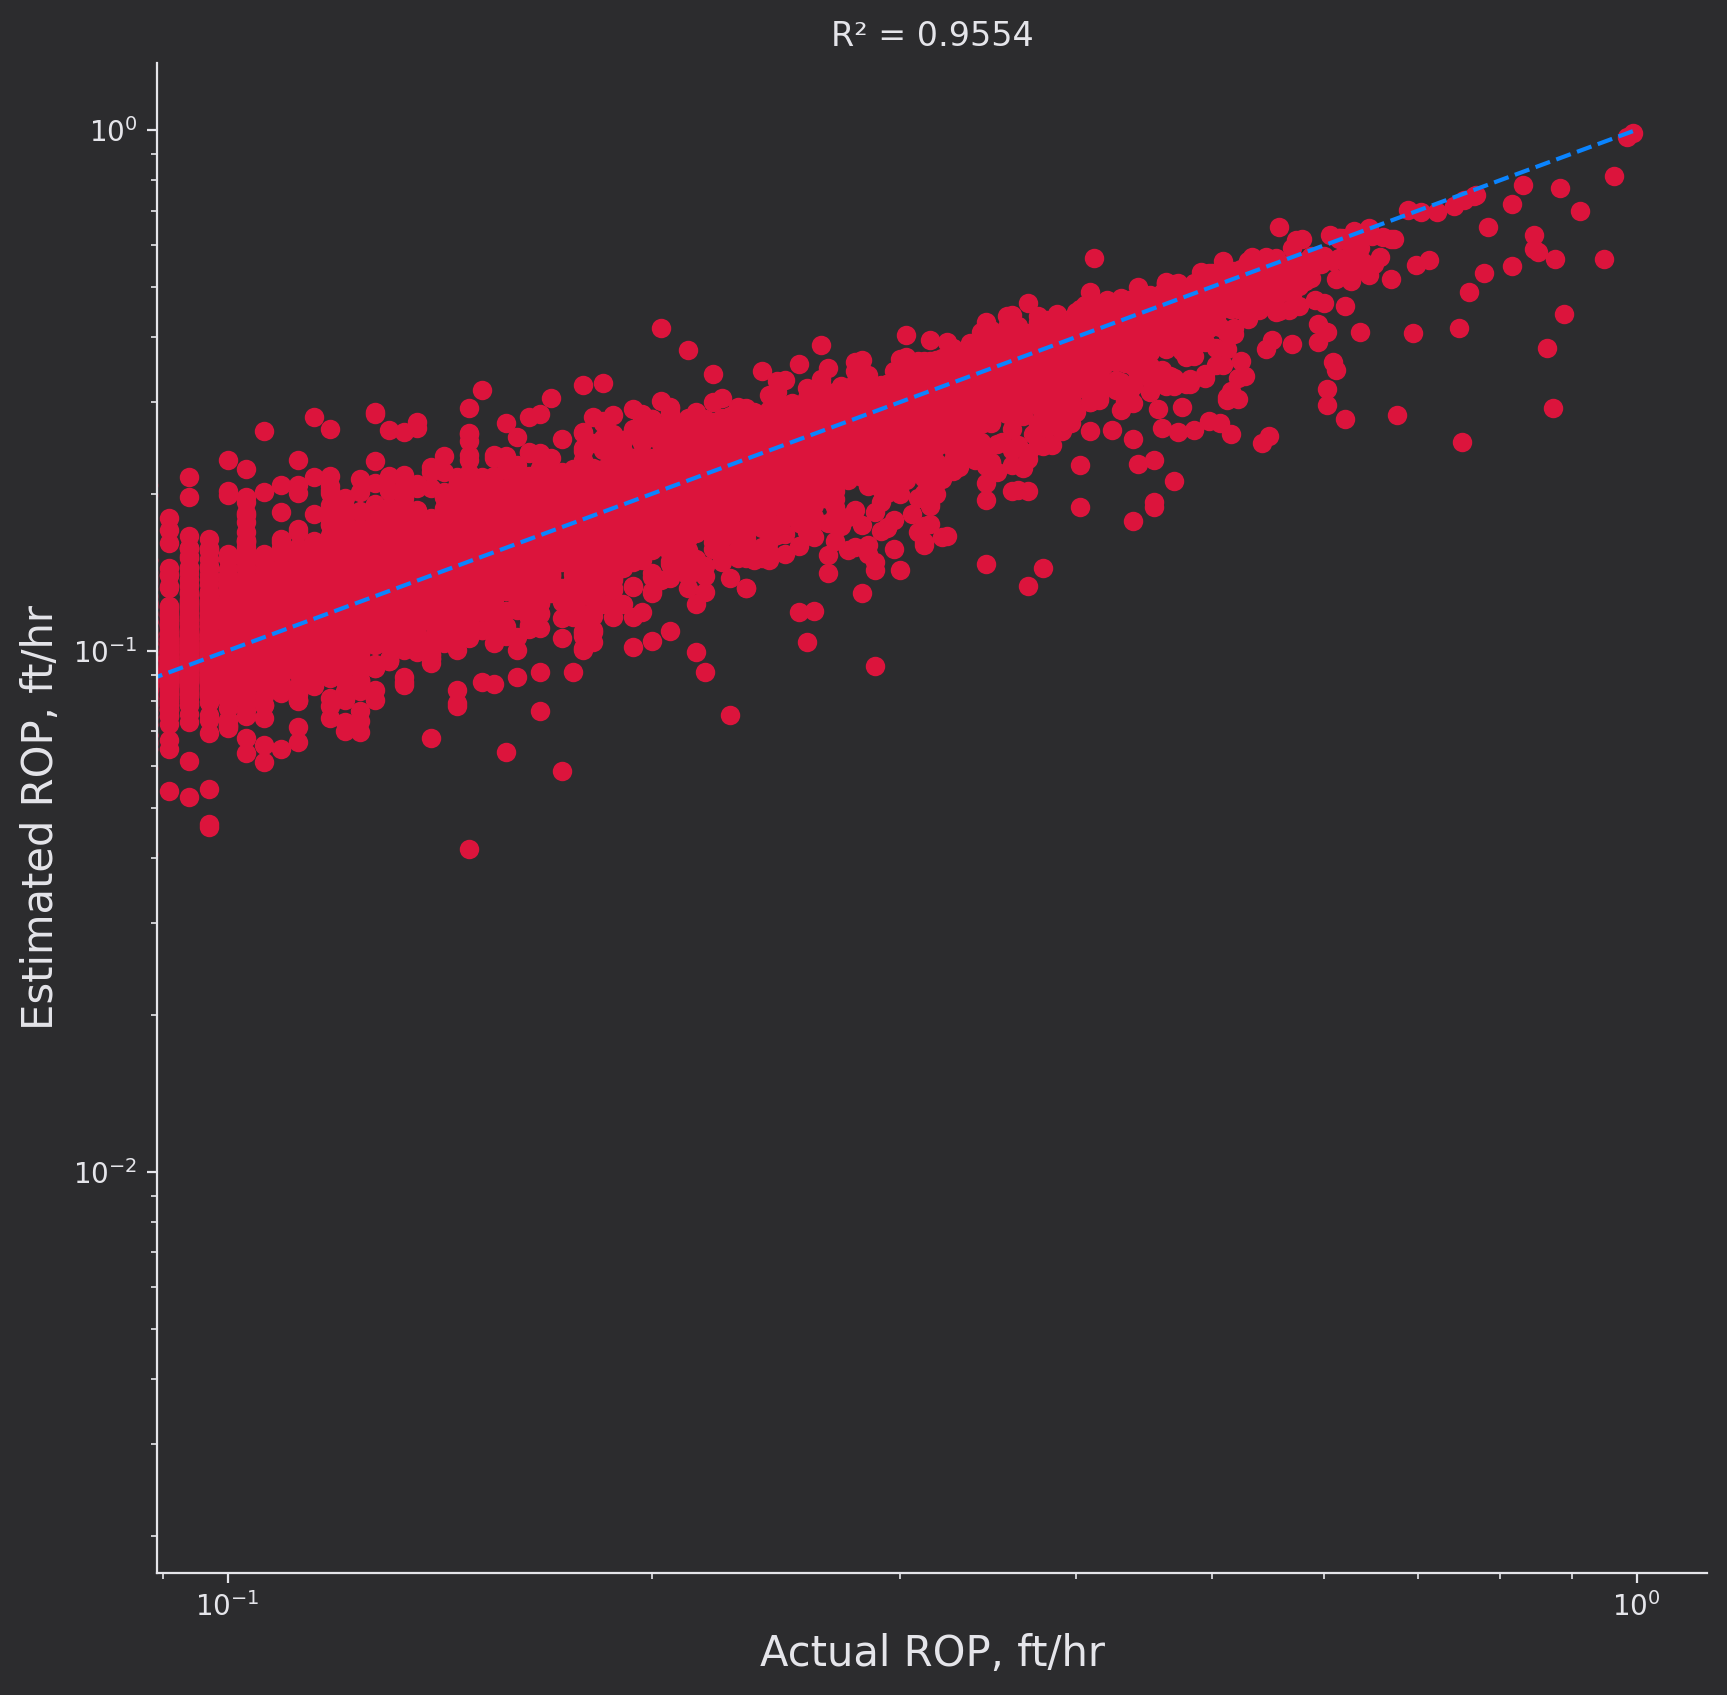

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson' , label = ' R² = 0.9554')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], '--')
plt.xlabel('Actual ROP, ft/hr', fontsize=15)
plt.ylabel('Estimated ROP, ft/hr', fontsize=15)
plt.title('R² = 0.9554')
plt.show()